======================================================

COGSCI 88 - Data Science and The Mind (Yang Xu)

Demo starter code for analyzing the World Color Survey (WCS)

Data source: http://www1.icsi.berkeley.edu/wcs/data.html

=====================================================

  Courtesy of Vasilis Oikonomou, Joshua Abbott, & Jessie Salas
  
  $\alpha$-tested by Elva Xinyi Chen  
  
  Copyright @ 2016, UC Berkeley


In [1]:
# Import helper function file for WCS data analysis
from wcs_helper_functions import *

# Import relevant Python libraries
import numpy as np
from scipy import stats
from random import random
%matplotlib inline

> Demo 1: Import stimulus (color chip) information in Munsell space (https://en.wikipedia.org/wiki/Munsell_color_system)

> Stimuli were 330 color chips in Munsell space, each defined along lightness (alphabet) and hue (integer) dimensions

In [2]:
# Load chip information in Munsell
munsellInfo = readChipData('./WCS_data_core/chip.txt');

# Obtain stimuli in Munsell coordinates
indexCoord = munsellInfo[1]

# "munsellCoord" is a dictionary that includes index (key)-coordinate (value) pairs
# Note: Index for Munsell chips ranges from 1 to 330
# For example, to retrieve the Munsell coordinate (lightness, hue) for chip with numerical index 1:
print(indexCoord[1])

# You can also uncomment the following to display full stimulus information (long)
#print(indexCoord)

('E', '29')


In [3]:
# Alternatively, stimuli can also be represented in coordinate (key)-index (value) pairs
coordIndex = munsellInfo[0];

# For example, to access numerical index for color chip in Munsell coordinate D-11:
print(coordIndex['D11']);

# You can also uncomment the following to display full stimulus information (long)
#print(coordIndex); 

258


> Demo 2: Import stimulus information in CIELAB space (https://en.wikipedia.org/wiki/Lab_color_space)

> Each of the 330 stimuli can also be mapped to the 3D CIELAB space, where the dimensions are l (lightness), a, & b (color opponency)

In [4]:
# Load chip coordinates in CIELAB
cielabCoord = readClabData('./WCS_data_core/cnum-vhcm-lab-new.txt')

# For example, to obtain the cielab coordinates for chip with numerical index 1 (1-1 correspondence with Munsell index):
# Note: Index for chips ranges from 1 to 330, just as in the Munsell case
print(cielabCoord[1])

('61.70', '-4.52', '-39.18')


> Demo 3: Import color naming data
    
> Each of the 330 color chips was named by speakers of 110 different languages

In [5]:
# Load naming data
namingData = readNamingData('./WCS_data_core/term.txt');

# "namingData" is a hierarchical dictionary organized by language->speaker->chip index(key)-color term(value)
# For example, to obtain naming data from language 1 and speaker 1 for all 330 color chips:
namingData[1][1]; # Delete the semicolon to display data in full (long)

# Note: Index for languages ranges from 1 to 110 (i.e. 110 languages in total);
# index for speakers begins with 1, but its range varies depending on language
# For example, to see how many speakers language 1 has:
len(namingData[1])

25

> Demo 4: Import color foci data
    
> Apart from naming the color chips, each speaker also pointed to foci color chips for each color term they had used

> Note: A single color term may have multiple foci locations

In [6]:
# Load foci data
fociData = readFociData('./WCS_data_core/foci-exp.txt');

# "fociData" is a hierarchical dictionary organized by language->speaker->color term(key)-foci coordinates(value)
# For example, to obtain foci data for language 1 and speaker 1:
fociData[1][1]

# Each entry shows the foci location(s) for a given term, e.g. foci for term 'F' is located at D-25 in the Munsell chart

{'F': ['D:25'],
 'G': ['F:17'],
 'LB': ['J:0'],
 'LE': ['F:1', 'F:2', 'F:3', 'G:1', 'G:2', 'G:3'],
 'LF': ['A:0'],
 'WK': ['D:9', 'D:10', 'D:11', 'D:12']}

> Demo 5: Import speaker demographic information

> For most speakers in the WCS survey, their age (integer) and gender (M/F) information were recorded

In [7]:
# Load speaker information
speakerInfo = readSpeakerData('./WCS_data_core/spkr-lsas.txt')

# "speakerInfo" is a hierarchical dictionary organized by language->speaker(key)-(age,gender)(value)
# To access (age, gender) information for all speakers from language 1
print(speakerInfo[1])

{1: [('90', 'M')], 2: [('26', 'M')], 3: [('38', 'M')], 4: [('35', 'M')], 5: [('80', 'M')], 6: [('48', 'M')], 7: [('26', 'M')], 8: [('39', 'M')], 9: [('47', 'F')], 10: [('49', 'M')], 11: [('40', 'F')], 12: [('45', 'M')], 13: [('50', 'M')], 14: [('30', 'M')], 15: [('21', 'M')], 16: [('60', 'F')], 17: [('32', 'M')], 18: [('67', 'M')], 19: [('15', 'M')], 20: [('42', 'M')], 21: [('40', 'M')], 22: [('47', 'M')], 23: [('23', 'F')], 24: [('45', 'F')], 25: [('30', 'F')]}


In [8]:
# For example, to obtain age and gender for speaker 1 from language 1
lg1_spk1 = speakerInfo[1][1]
print(lg1_spk1)

[('90', 'M')]


> Demo 6: Visualize color naming from an individual speaker

> Naming patterns from a speaker can be visualized in the stimulus palette (Munsell space)

In [9]:
# Extract an example speaker data from an example language 
lg61_spk5 = namingData[61][5]

In [10]:
# Extract color terms used by that speaker
terms = lg61_spk5.values()

# Encode the color terms into random numbers (for plotting purposes)
encoded_terms = map_array_to(terms, generate_random_values(terms))


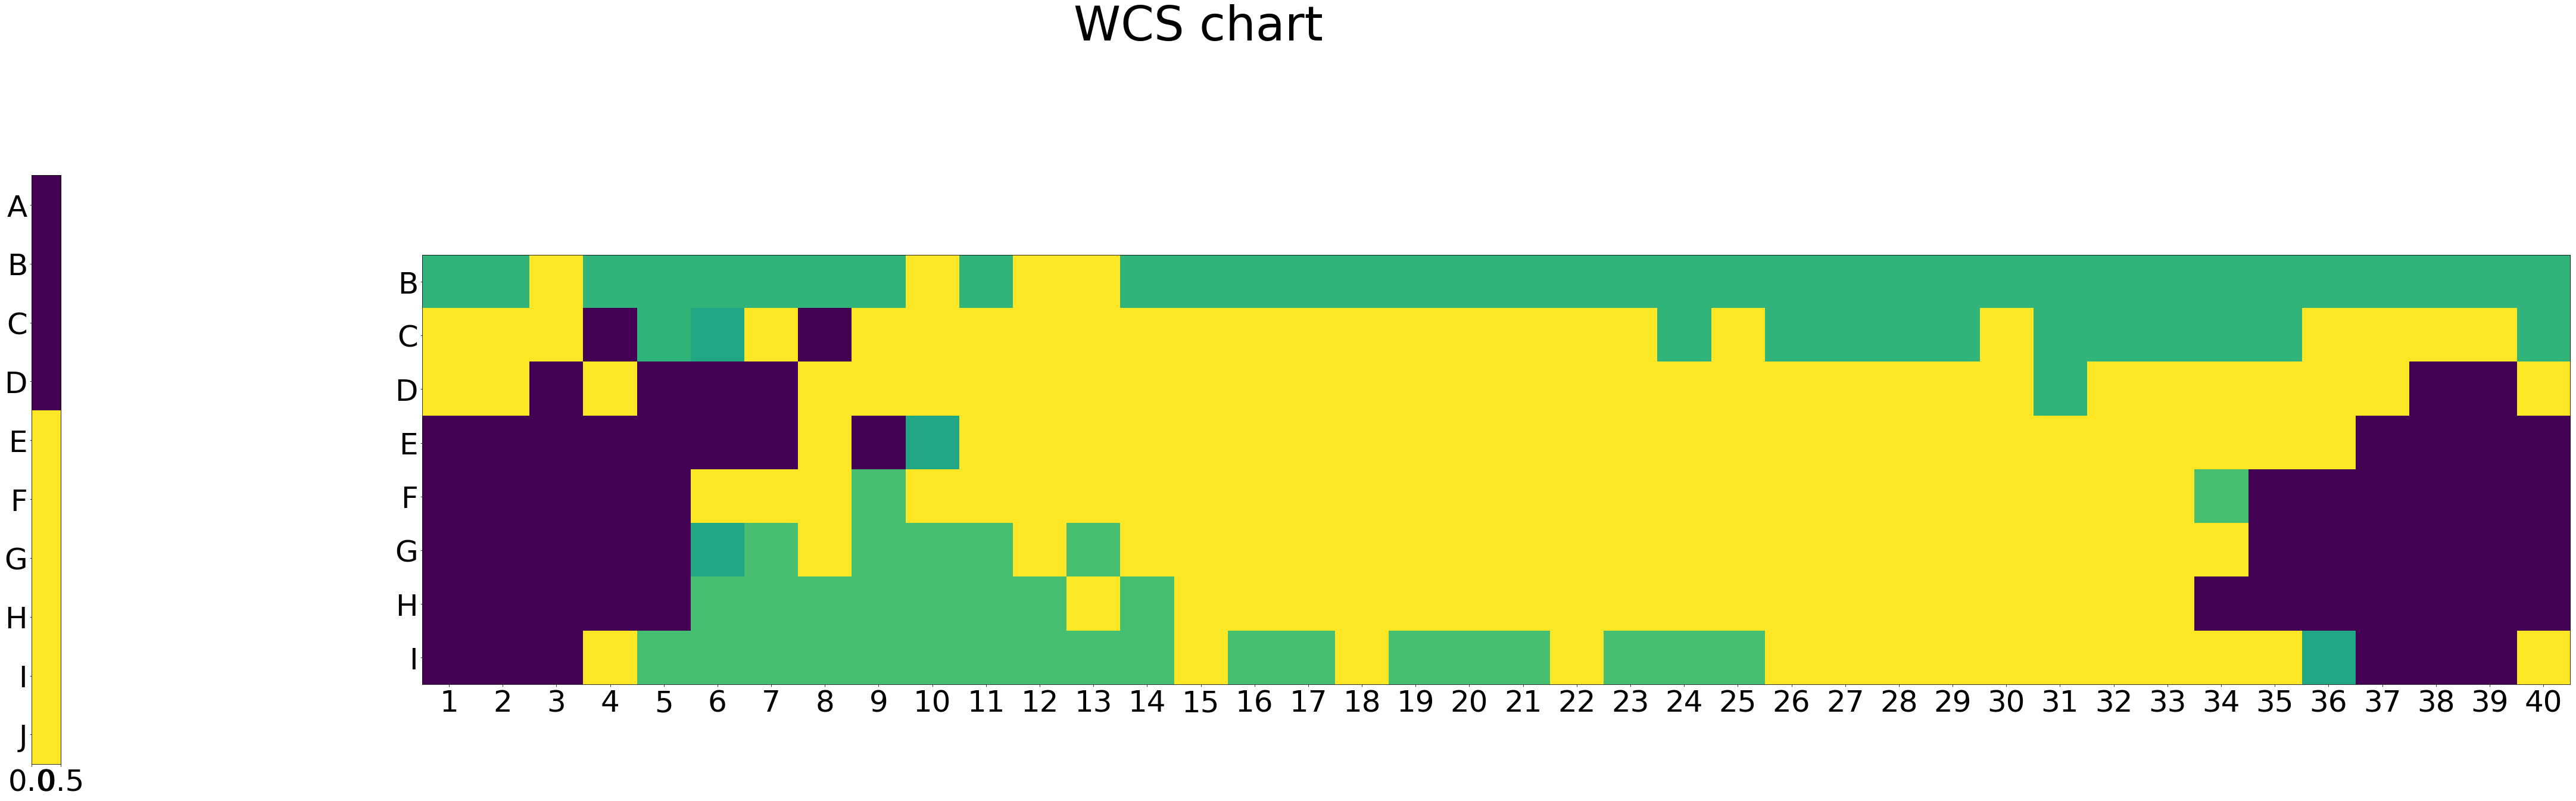

In [11]:
# Visualize the color naming pattern for that speaker: Each color patch corresponds to extension of a color term
# Color scheme is randomized, but the partition of the color space is invariant
plotValues(encoded_terms)

# Note: "plotValues()" is a generic function for visualizing various kinds of information on the chart, suited to needs

Now you are in a position to start exploring this data set - enjoy!